In [1]:
import numpy as np
import math
import random
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.animation as animation

from IPython.display import display, clear_output

SIZE = 6

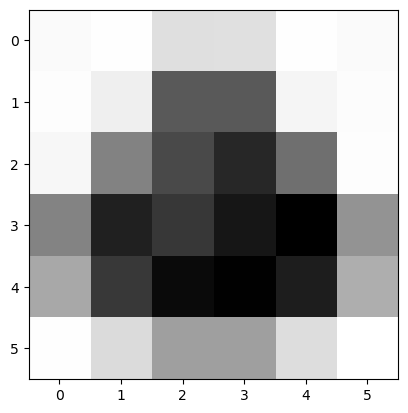

In [2]:
img_colord = Image.open('ressources/melon.jpg')
img_colord.thumbnail((SIZE, SIZE))  # resizes image in-place
img_colord_plot = plt.imshow(img_colord)
img_gray = img_colord.convert('L')
img_plot = plt.imshow(img_gray, cmap='gray')

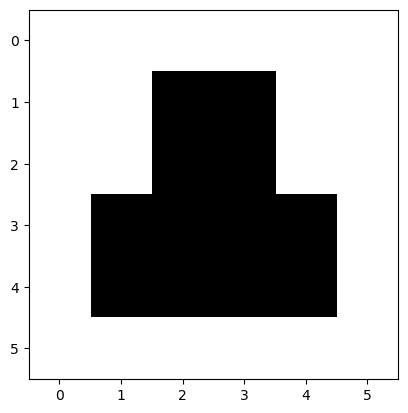

In [3]:
img = np.asarray(img_gray)
array = np.zeros((SIZE, SIZE), dtype=int)

for i, line in enumerate(img):
    for j, pixel in enumerate(line):
        if pixel > 120:
            array[i][j] = 0
        else:
            array[i][j] = 1
imgplot = plt.imshow(array, cmap='binary')

In [4]:
row_restrictions = []
col_restrictions = []

for i in range(SIZE):
    row_restrictions.append([])
    col_restrictions.append([])
    for j in range(SIZE):
        if array[i][j] == 1:
            if len(row_restrictions[i]) == 0:
                row_restrictions[i].append(1)
            elif array[i][j-1] == 1:
                row_restrictions[i][len(row_restrictions[i]) - 1] += 1
            else:
                row_restrictions[i].append(1)

        if array[j][i] == 1:
            if len(col_restrictions[i]) == 0:
                col_restrictions[i].append(1)
            elif array[j-1][i] == 1:
                col_restrictions[i][len(col_restrictions[i]) - 1] += 1
            else:
                col_restrictions[i].append(1)

print(f'row_restrictions = {row_restrictions}')
print(f'col_restrictions = {col_restrictions}')


row_restrictions = [[], [2], [2], [4], [4], []]
col_restrictions = [[], [2], [4], [4], [2], []]


In [5]:
class NNG:
    def __init__(self, row_restrictions, col_restrictions) -> None:
        self.matrix = np.zeros((SIZE, SIZE))
        self.row_restrictions = row_restrictions
        self.col_restrictions = col_restrictions
        self.tryed = []
        self.aufruf = 0

    def print(self, temp_matrix):
        plt.imshow(temp_matrix, cmap='binary')

    def solved(self, temp_matrix):
        self.tryed.append(temp_matrix.copy())
        temp_row_restrictions = []
        temp_col_restrictions = []
        for i in range(SIZE):
            temp_row_restrictions.append([])
            temp_col_restrictions.append([])
            for j in range(SIZE):
                if temp_matrix[i][j] == 1:
                    if len(temp_row_restrictions[i]) == 0:
                        temp_row_restrictions[i].append(1)
                    elif array[i][j-1] == 1:
                        temp_row_restrictions[i][len(temp_row_restrictions[i]) - 1] += 1
                    else:
                        temp_row_restrictions[i].append(1)

                if temp_matrix[j][i] == 1:
                    if len(temp_col_restrictions[i]) == 0:
                        temp_col_restrictions[i].append(1)
                    elif array[j-1][i] == 1:
                        temp_col_restrictions[i][len(temp_col_restrictions[i]) - 1] += 1
                    else:
                        temp_col_restrictions[i].append(1)
                        
        if temp_row_restrictions == self.row_restrictions and temp_col_restrictions == self.col_restrictions:
            return True
        return False


    def rec_step(self, temp_matrix, i, j):
        self.aufruf += 1
        if temp_matrix.min() != -1 and self.solved(temp_matrix):
            print('found solution')
            self.print(temp_matrix)
            return True
        for x in [0, 1]:
            next_i = i + 1
            next_j = j
            if next_i >= SIZE:
                next_i = 0
                next_j = j + 1
            if next_j < SIZE:
                temp_matrix[next_i][next_j] = x
                if self.rec_step(temp_matrix, next_i, next_j):
                    return True
        

    def solv(self):
        self.rec_step(np.full((SIZE, SIZE), -1, dtype=int), -1, 0)
        print(array)

In [6]:
def distance(p0, p1):
    return math.sqrt((p0[0] - p1[0])**2 + (p0[1] - p1[1])**2)

In [7]:


class NNG_Random:
    def __init__(self, row_restrictions, col_restrictions) -> None:
        self.matrix = np.zeros((SIZE, SIZE))
        self.row_restrictions = row_restrictions
        self.col_restrictions = col_restrictions
        self.tryed = []
        self.aufruf = 0
        self.sequence = []

    def solved(self, temp_matrix):
        self.tryed.append(temp_matrix.copy())
        temp_row_restrictions = []
        temp_col_restrictions = []
        for i in range(SIZE):
            temp_row_restrictions.append([])
            temp_col_restrictions.append([])
            for j in range(SIZE):
                if temp_matrix[i][j] == 1:
                    if len(temp_row_restrictions[i]) == 0:
                        temp_row_restrictions[i].append(1)
                    elif array[i][j-1] == 1:
                        temp_row_restrictions[i][len(temp_row_restrictions[i]) - 1] += 1
                    else:
                        temp_row_restrictions[i].append(1)

                if temp_matrix[j][i] == 1:
                    if len(temp_col_restrictions[i]) == 0:
                        temp_col_restrictions[i].append(1)
                    elif array[j-1][i] == 1:
                        temp_col_restrictions[i][len(temp_col_restrictions[i]) - 1] += 1
                    else:
                        temp_col_restrictions[i].append(1)
                        
        if temp_row_restrictions == self.row_restrictions and temp_col_restrictions == self.col_restrictions:
            return True
        return False

    def rec_step(self, temp_matrix, i):
        self.aufruf += 1
        if temp_matrix.min() != -1 and self.solved(temp_matrix):
            return True
        for x in [1, 0]:
            next_i = i + 1
            if next_i < len(self.sequence):
                temp_matrix[self.sequence[i][0]][self.sequence[i][1]] = x
                if self.rec_step(temp_matrix, next_i):
                    return True
                
    def create_seq(self):
        temp_seq_orderd = []
        for i in range(SIZE):
            for j in range(SIZE):
                temp_seq_orderd.append((i, j))
        middle = temp_seq_orderd[int(len(temp_seq_orderd) / 2)]

        temp_seq = []
        while len(temp_seq_orderd) > 0:
            temp_seq_orderd.remove(middle)
            temp_seq.append(middle)

            neighbors = []
            for item in temp_seq_orderd:
                if distance(item, middle) < 2:
                    neighbors.append(item)
            if len(neighbors) > 0:
                middle = random.choice(neighbors)
            elif len(temp_seq_orderd) > 0:
                middle = random.choice(temp_seq_orderd)
            else:
                pass
        self.sequence = temp_seq
        return


    def solv(self):
        self.create_seq()
        print(self.sequence)


        self.rec_step(np.full((SIZE, SIZE), -1, dtype=int), -1)
        print(array)

In [8]:
from dataclasses import dataclass

@dataclass
class Block:
    row: int
    number: int
    length: int
    start_pos: int

    def end_pos(self) -> int:
        return self.start_pos + self.length


class NNG_Shift:
    def __init__(self, row_restrictions, col_restrictions) -> None:
        self.blocks: list[Block] = self.create_blocks(row_restrictions)
        self.active_block = len(self.blocks) - 1
        self.col_restrictions = col_restrictions
        self.tryed = []
        self.aufruf = 0

    def create_blocks(self, row_restrictions) -> list[Block]:
        blocks: list[Block] = []
        # create Array with all Blocks
        for i, rr in enumerate(row_restrictions):
            current_shift = 0
            for j, n in enumerate(rr):
                blocks.append(Block(i, j, n, current_shift))
                current_shift += n + 1
        return blocks

    def solved(self, temp_matrix):
        self.aufruf += 1
        self.tryed.append(temp_matrix.copy())
        temp_col_restrictions = []
        for i in range(SIZE):
            temp_col_restrictions.append([])
            for j in range(SIZE):

                if temp_matrix[j][i] == 1:
                    if len(temp_col_restrictions[i]) == 0:
                        temp_col_restrictions[i].append(1)
                    elif array[j-1][i] == 1:
                        temp_col_restrictions[i][len(temp_col_restrictions[i]) - 1] += 1
                    else:
                        temp_col_restrictions[i].append(1)
                        
        if temp_col_restrictions == self.col_restrictions:
            return True
        return False

    def create_matrix(self):
        temp_matrix = np.zeros((SIZE, SIZE), dtype=int)
        for b in self.blocks:
            for i in range(b.length):
                temp_matrix[b.row][b.start_pos + i] = 1
        return temp_matrix
    
    def shift_is_possible(self) -> bool:
        # check if block would be pushed out of the board
        # print(f'shift_is_possible: self.blocks[self.active_block].end_pos() = {self.blocks[self.active_block].end_pos()}')
        if self.blocks[self.active_block].end_pos() >= SIZE:
            return False
        # check if next Block ist blocking the current Block
        if self.active_block < len(self.blocks) - 2:
            if self.blocks[self.active_block].row ==  self.blocks[self.active_block + 1].row:
                if self.blocks[self.active_block].end_pos() + 1 >= self.blocks[self.active_block + 1].start_pos:
                    return False
        return True
    
    def shift(self):
        if self.shift_is_possible():
            self.blocks[self.active_block].start_pos += 1
        else:
            while not self.shift_is_possible():
                self.active_block -= 1
                if self.active_block == -1:
                    print('NNG nicht lösbar')
            self.blocks[self.active_block].start_pos += 1

            # reset all following blocks
            current_row = self.blocks[self.active_block].row
            current_shift = self.blocks[self.active_block].end_pos() + 1
            for i in range(self.active_block + 1, len(self.blocks)):
                if current_row != self.blocks[i].row:
                    current_shift = 0
                    current_row = self.blocks[i].row
                
                self.blocks[i].start_pos = current_shift
                current_shift = self.blocks[i].end_pos() + 1
            self.active_block = len(self.blocks) - 1
        
    def solv(self):
        solved = False
        while not solved:
            if self.solved(self.create_matrix()):
                solved = True
            else:
                self.shift()
        

In [9]:
nng = NNG_Shift(row_restrictions, col_restrictions)
nng.solv()
print(nng.aufruf)
# print(nng.tryed)



113


In [10]:


plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 75
plt.rcParams['animation.embed_limit'] = 300
plt.ioff()
fig, ax = plt.subplots()


def animate(t):
    plt.cla()
    plt.imshow(nng.tryed[t], cmap='binary')
animation.FuncAnimation(fig, animate, frames=len(nng.tryed))